# **Part 1: Classification datasets**

In [1]:
# Pretty svg plots in notebook
%config InlineBackend.figure_format = "svg"

## Loading and glancing over our data

We can easily load our `sklearn` dataset using the function `load_breast_cancer`. We set the argument `as_frame` to `True` for the function to return a `pandas` `DataFrame`.

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target

Before we start exploring the dataset, run the next code cell.

Unfortunately, our dataset is imbalanced: some classes have more data points than others. Properly dealing with imbalanced datasets is a delicate matter and requires some more tools that we will not explore in this workshop.

In the following cell, I created a function that balances the dataset so that all classes are equally represented (NOTE: this is NOT how you should handle imbalanced datasets when you encounter them in the wild!).

Do not worry about the function, you do not need to understand how it works (though by all means do if you are curious). In this workshop, we will assume that our dataset is indeed balaced and work from there:

In [3]:
def balance_dataset(X, y, random_state):
  # Oversampling minority class to get same class representation
  num_samples = y[y==1].shape[0] - y[y==0].shape[0]
  sample_idx = y[y==0].sample(num_samples, random_state=random_state).index

  # Get new X and y
  sample_X, sample_y = X.iloc[sample_idx].copy(), y.iloc[sample_idx].copy()

  # Add new samples
  X = pd.concat([X, sample_X], ignore_index=True)
  y = pd.concat([y, sample_y], ignore_index=True)

  return X, y


# Create random state variable to ensure reproducibility in all pseudo-random operations
random_state = 42

# Balance the dataset
X, y = balance_dataset(X, y, random_state)

Now that our dataset is balanced, let's starting glancing over it and try to get to know our data a little better.

First, let's take a look at our features `DataFrame`:

In [4]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,15.70,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.05189,0.1618,0.05549,...,20.11,32.82,129.30,1269.0,0.1414,0.3547,0.2902,0.1541,0.3437,0.08631
710,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.12650,0.1875,0.06020,...,24.19,33.81,160.00,1671.0,0.1278,0.3416,0.3703,0.2152,0.3271,0.07632
711,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,...,20.60,24.13,135.10,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
712,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929


Now let's take a look at our label `Series`:

In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
709    0
710    0
711    0
712    0
713    0
Name: target, Length: 714, dtype: int64

From this description of our labels, we can see that they have an `int64` data type. This means that our labels are **numeric** and **discrete**.

We can compare the `shape` of our features to that our labels:

In [6]:
print(X.shape, y.shape)

(714, 30) (714,)


From this comparison we can see that we have 714 data points (the rows in our features and labels).

Additionally, we can see that each data point contains 30 features that describe it.

Let's see what these features are called and get information about their data types using the `info` `DataFrame` method:

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              714 non-null    float64
 1   mean texture             714 non-null    float64
 2   mean perimeter           714 non-null    float64
 3   mean area                714 non-null    float64
 4   mean smoothness          714 non-null    float64
 5   mean compactness         714 non-null    float64
 6   mean concavity           714 non-null    float64
 7   mean concave points      714 non-null    float64
 8   mean symmetry            714 non-null    float64
 9   mean fractal dimension   714 non-null    float64
 10  radius error             714 non-null    float64
 11  texture error            714 non-null    float64
 12  perimeter error          714 non-null    float64
 13  area error               714 non-null    float64
 14  smoothness error         7

From this description, we can see that all our feature columns have a `float64` data type. This means that all features are **numeric** and **continuous**. Besides numeric features, there are also **categorical** ones, and numeric features can also be **discrete**, just as our labels. Each of these need different techniques to be properly processed or visualized, but we will focus on numeric variables in this workshop.

We can also get some quick statistics of our features using the `describe` method, which is applicable to both `DataFrames` and `Series` objects:

In [8]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,14.791357,19.756639,96.622465,718.276050,0.097596,0.112732,0.103450,0.056665,0.183552,0.062795,...,17.258584,26.438739,114.197731,989.971148,0.134930,0.281797,0.313036,0.128908,0.298365,0.085778
std,3.680802,4.350317,25.383523,370.998125,0.013914,0.055630,0.083575,0.040767,0.028124,0.007206,...,5.117194,6.222714,35.559941,612.562961,0.023099,0.170823,0.220277,0.068534,0.067521,0.019466
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.050000,16.760000,77.840000,446.050000,0.087630,0.070270,0.035480,0.023168,0.163425,0.057510,...,13.340000,21.980000,86.730000,546.700000,0.119600,0.162050,0.139125,0.073758,0.254950,0.072485
50%,13.960000,19.470000,90.795000,599.950000,0.097400,0.104950,0.084675,0.048770,0.180900,0.061475,...,16.010000,26.160000,105.900000,784.150000,0.134800,0.240200,0.281750,0.121800,0.286800,0.081195
75%,17.337500,22.140000,114.200000,932.550000,0.106400,0.143600,0.154275,0.085910,0.197800,0.066397,...,20.580000,30.522500,137.625000,1301.250000,0.149475,0.374475,0.439900,0.182700,0.324475,0.094677
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Using the `unique` method, we can see all the classes we have in our label `Series`:

In [9]:
y.unique()

array([0, 1])

There are two classes:
- Class $0$ represents patients that are negative for breast cancer
- Class $1$ represents patients that are positive for breast cancer

Classification problems with two classes are very common and are called **Binary Classification** problems

We already balanced our dataset, but let's make a quick check that in fact both classes are equally represented:

In [10]:
for c in y.unique():
  # Filter label series to get only data-points in class 'c'
  class_mask = y == c
  y_c = y[class_mask]

  print(f"Class: {c} | Number of data points: {y_c.shape[0]}")

Class: 0 | Number of data points: 357
Class: 1 | Number of data points: 357


## Data visualization

Now that we have had a general look at the data, let's get to understand it better by visualizing it. The libraries we will be using for this purpuse are `matplotlib` and `seaborn`, which are some of the best libraries out there for this purpose!

Let's start by visualizing our feature distributions. Since all our features are **numeric**, a good way to visualize them is using a **histogram**, which we can plot using the `histplot` function from the `seaborn` library.

In [11]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

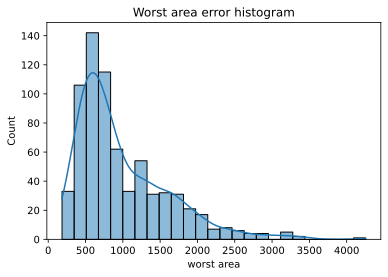

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Worst area error histogram")
sns.histplot(data=X, x="worst area", kde=True)
plt.show()

Intead of looking at these distributions one by one, we can can create a `matplotlib` `figure` with multiple `axis` objects, one per plot, so that we represent all distributions in the same `figure`:

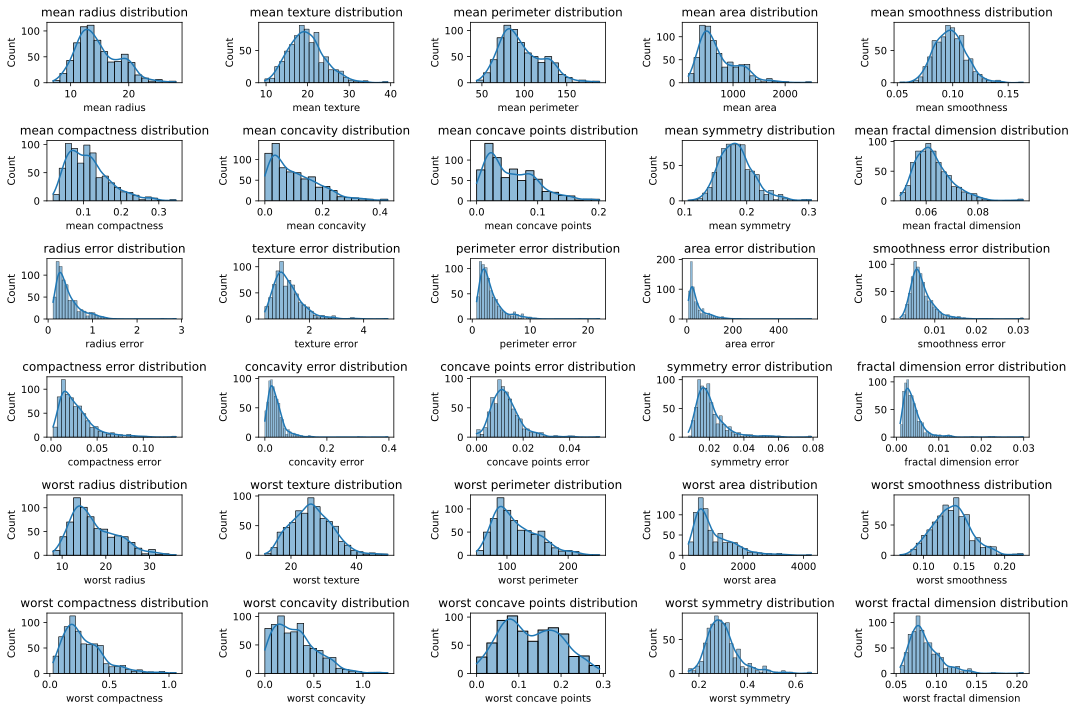

In [13]:
# Define the figure and axis objects
cols = 5
rows = round(X.shape[1] / cols)
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Iterate every feature
for idx, key in enumerate(X):

  # Get the correct axis to plot
  i, j = idx // cols, idx % cols
  ax = axs[i, j]

  # Plot the feature distribution
  ax.set_title(f"{key} distribution")
  sns.histplot(data=X, x=key, kde=True, ax=ax)

plt.tight_layout()
plt.show()

Now that is a lot of information in just one figure! We can see that some distributions appear normally distributed, although most of them are skewed and have long tails.

But how are they helpful in distinguishing classes? We can make a more helpful plot by using the `hue` argument of the `sns` `histplot` function. This will allow us to plot two different histograms for each feature:
- One histogram for patients with breast cancer
- One histogram for patients without breast cancer

Hopefully these histograms will help us understand which features are helpful in separating these two classes:

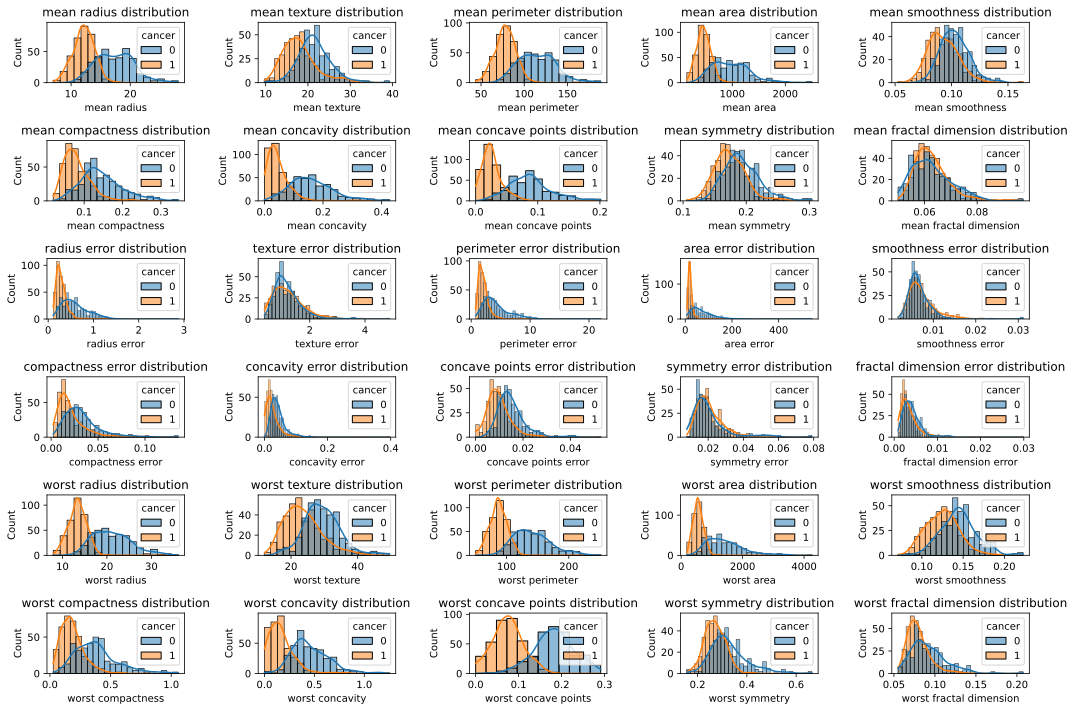

In [14]:
# Create figure and axis
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Join features and labels in single dataframe (just to simplify plot labels)
df = pd.concat([X, y.rename("cancer")], axis=1)

# Iterate every feature
for idx, key in enumerate(X):

  # Get the correct axis to plot
  i, j = idx // cols, idx % cols
  ax = axs[i, j]

  # Plot the feature distribution
  ax.set_title(f"{key} distribution")
  sns.histplot(data=df, x=key, hue="cancer", kde=True, ax=ax)

plt.tight_layout()
plt.show()

Now look at the distributions! You can clearly see that some features' distributions are completely for patients with breast cancer are completely different from those without!

For example, the *worst concave points* feature is a lot more skewed to the left for patients with breast cancer than for patients without it. This means that this feature is likely to be very useful in performing classification!

On the other hand, the symmetry error distribution is very similar for both classes. It will likely not be a good feature for our classification task, as it is bad at separating our classes!

**CHALLENGE**: what other variables are likely to be good or bad at separating our classes?

A lot of other plots can be explored. Good plots to try next are **boxplots** and **scatterplots**, using the `seaborn` `boxplot` and `scatterplot` functions. Explore the `seaborn` and `matplotlib` docs!

## Splitting the data into training and testing

Let's split our data into training and testing. We can easily do this using the `sklearn` `train_test_split` function:

In [15]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(571, 30) (571,)
(143, 30) (143,)


Now we have two datasets:
- **Training dataset**: used for training our models
- **Test dataset**: used for evaluating our trained models in data they haven't seen

# **Part 2: Model training and selection**

## Quick look at training and predicting with `sklearn` API

Training models using `sklearn` is extremelly easy.

Below is an example of creating a decision tree classifier, training it on our data and predicting on test data. All of this is done in three lines of code!

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Create model
model = DecisionTreeClassifier(random_state=random_state)
model

DecisionTreeClassifier(random_state=42)

In [17]:
# Fit model to training data
model = model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

Let's calculate the **accuracy** of our model predictions: the fraction of predictions it got right! We can easily do this in `pandas` with what we have learnt so far, but we'll use `sklearn` `accuracy_score` function:

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.916083916083916

Look at that! Just as simple as this, we made a model that got predictions right $97\%$ of the time on data it had never seen before: our test data.

**CHALLENGE**: write your own `accuracy_score` function.

## Tuning our models

When defining our `DecisionTreeClassifier`, we left it with the default **hyperparameters** (except for `random_state` to ensure reproducibility). However, the `DecisionTreeClassifier` has other hyperparameters like `criterion` and `splitter`. 

If you remember, a hyperparameter is used to **control** the learning process, and therefore can't be learnt in that same learning process. This implies that parameters like `criterion` or `splitter` are never changed when calling the `fit` method of `sklearn`. Optimizing them requires using different methods.

**IDEA**: to select from 100 models, let's train all of them and select the one with the best performance. This is called a **Grid Search**.

Now, we don't want to use our test data to perform this selection: its purpose is to evaluate our best model in the very end of the training/selection/tuning process (it should remain untouched until then). We should split our training data further into a **validation dataset** and use it to evaluate each model. Thankfully, `sklearn` does all this for us with its `GridSearchCV` class.

In [19]:
from sklearn.model_selection import GridSearchCV

# Parameter space to search
parameter_space = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "random_state": [random_state]
}

# Create base model
base_model = DecisionTreeClassifier(random_state=random_state)

# Create Grid searcher
grid_search = GridSearchCV(
  estimator=base_model, 
  param_grid=parameter_space,
  scoring="accuracy"
)
grid_search

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'random_state': [42],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
# Performing the grid search model tuning
grid_search = grid_search.fit(X_train, y_train)

# Outputting the best model parameters
grid_search.best_params_

{'criterion': 'entropy', 'random_state': 42, 'splitter': 'random'}

Now that we have found the best hyperparameters (out of the hyperparameter space we defined) we can train our tuned model on the entire training set:

In [21]:
# Create tuned model
params = grid_search.best_params_
tuned_model = DecisionTreeClassifier(**params)

# Fit the tuned model to the training data
tuned_model = tuned_model.fit(X_train, y_train)
tuned_model

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

# **Part 3: Evaluating our models**

Now we have a tuned and trained model ready to be applied to new data. But before we apply it in the real world, we should have some notion of how it will perform on data it has never seen before.

How do we evaluate the model?

For classification, a common **metric** is the **accuracy**, which we have already used in this workshop:

In [22]:
# Get test predictions
y_pred = tuned_model.predict(X_test)

# Get accuracy score
accuracy_score(y_test, y_pred)

0.9440559440559441

Another very useful metric is the **confusion matrix**. For binary classification, our predictions can be separated into four groups, by comparing their true class to their predicted class:
- **True positives** (TP): the patents our model correctly classified as positive
- **False positives** (FP): the patients our model incorrectly classified as positive
- **True negatives** (TN): the patients our model correctly classified as negative
- **False negatives** (FN): the patients our model incorrectly classified as negative

We can calculate the confusion matrix using the `sklearn` `confusion_matrix` function and plot it using the `seaborn` `heatmap` function:

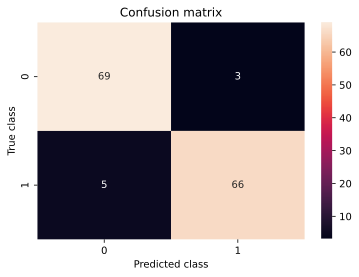

In [23]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.title("Confusion matrix")
sns.heatmap(cm, annot=True)
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

From the confusion matrix, we can see that we have:
- $69$ true negatives
- $5$ false negatives
- $66$ true positives
- $3$ false positives

A more visual way of checking model's predictions is to plot the true vs predicted distributions for each class:

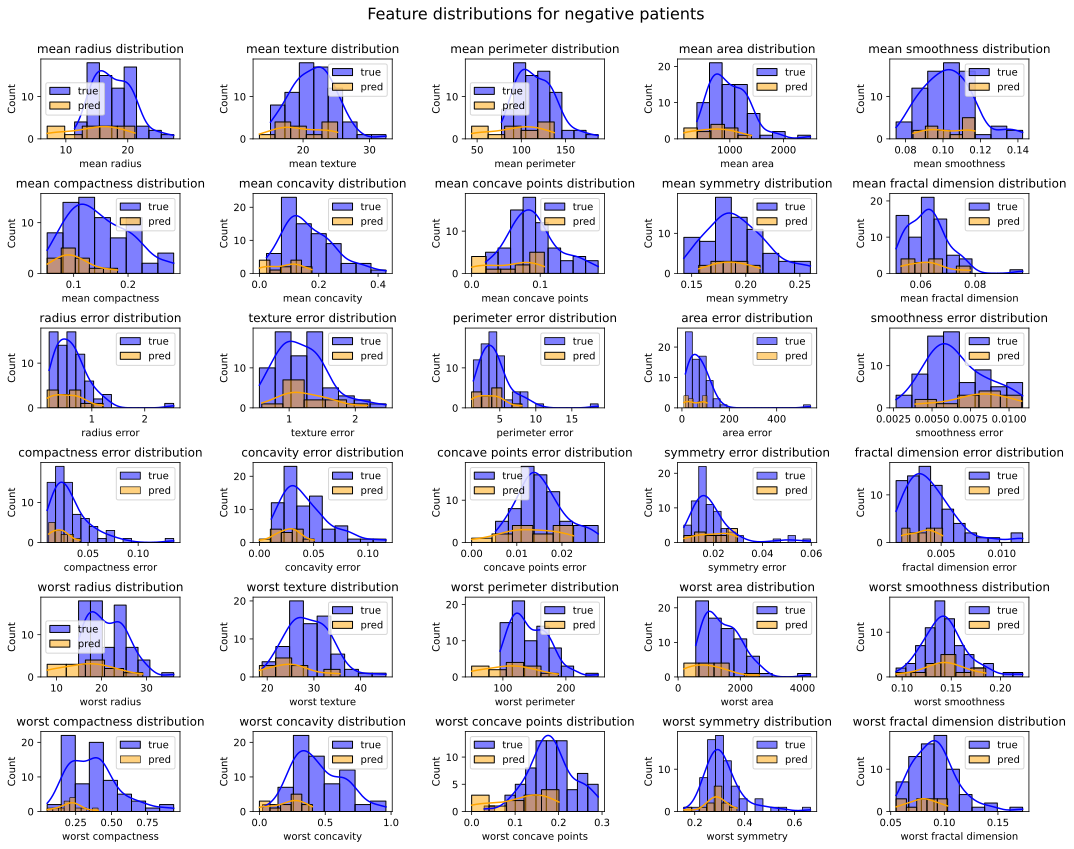

In [24]:
# Define class to plot
cancer = 0

# Create figure and axis
fig, axs = plt.subplots(rows, cols, figsize=(15, 12))

# Create title
cancer_str = "positive" if cancer == 1 else "negative"
title = f"Feature distributions for {cancer_str} patients"
fig.suptitle(title, fontsize=16)

# Join features and labels in single dataframe (just to simplify plot labels)
y_pred = pd.Series(y_pred)
df = pd.concat([X_test, y_test.rename("true"), y_pred.rename("pred")], axis=1)

# Iterate every feature
for idx, key in enumerate(X):

  # Get the correct axis to plot
  i, j = idx // cols, idx % cols
  ax = axs[i, j]

  # Plot the feature distribution
  ax.set_title(f"{key} distribution")
  sns.histplot(data=df[df["true"] == cancer], x=key, kde=True, ax=ax, label="true", color="blue")
  sns.histplot(data=df[df["pred"] == cancer], x=key, kde=True, ax=ax, label="pred", color="orange")
  ax.legend()

fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()